In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv("home_data.csv")

In [3]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
train.shape

(21613, 21)

In [7]:
corr, _ = pearsonr(train['id'], train ['price'])
print(corr)

-0.016762201362082313


In [8]:
corr, _ = spearmanr(train['date'], train ['price'])
print(corr)
print(_)

-0.010796726888070648
0.11246278262233476


In [9]:
corr, _ = pearsonr(train['bedrooms'], train ['price'])
print(corr)

0.30834959788482247


In [10]:
corr, _ = pearsonr(train['bathrooms'], train ['price'])
print(corr)

0.5251375045796023


In [11]:
corr, _ = pearsonr(train['sqft_living'], train ['price'])
print(corr)

0.7020350524336836


In [12]:
corr, _ = pearsonr(train['sqft_lot'], train ['price'])
print(corr)

0.08966085958211631


In [13]:
corr, _ = pearsonr(train['floors'], train ['price'])
print(corr)

0.256793884063341


In [14]:
corr, _ = pearsonr(train['waterfront'], train ['price'])
print(corr)

0.26636943437082033


In [15]:
corr, _ = pearsonr(train['view'], train ['price'])
print(corr)

0.39729348741975895


In [16]:
corr, _ = pearsonr(train['condition'], train ['price'])
print(corr)

0.03636179126617669


In [17]:
corr, _ = pearsonr(train['grade'], train ['price'])
print(corr)

0.667434253205702


In [18]:
corr, _ = pearsonr(train['sqft_above'], train ['price'])
print(corr)

0.6055672952130322


In [19]:
corr, _ = pearsonr(train['sqft_basement'], train ['price'])
print(corr)

0.32381602207278537


In [20]:
corr, _ = pearsonr(train['yr_built'], train ['price'])
print(corr)

0.05401152670038428


In [21]:
corr, _ = pearsonr(train['yr_renovated'], train ['price'])
print(corr)

0.12643379419686157


In [22]:
corr, _ = pearsonr(train['zipcode'], train ['price'])
print(corr)

-0.05320285100869865


In [23]:
corr, _ = pearsonr(train['lat'], train ['price'])
print(corr)

0.30700348176325765


In [24]:
corr, _ = pearsonr(train['long'], train ['price'])
print(corr)

0.02162623862879897


In [25]:
corr, _ = pearsonr(train['sqft_living15'], train ['price'])
print(corr)

0.5853789016432749


In [26]:
corr, _ = pearsonr(train['sqft_lot15'], train ['price'])
print(corr)

0.08244715175814857


In [27]:
#train.tail()

In [28]:
train['year'] = train['date'].astype(str).str[0:4]
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [29]:
train['year'] = train['year'].astype(int)

In [30]:
train = train.drop(['date', 'id'], axis = 1)

In [31]:
x = train.drop(['price'], axis =1).values

In [32]:
x = preprocessing.StandardScaler().fit_transform(x)
x[0:5]

array([[-0.39873715, -1.44746357, -0.97983502, -0.22832133, -0.915427  ,
        -0.08717263, -0.30575946, -0.62918687, -0.55883575, -0.73470764,
        -0.65868104, -0.54489777, -0.21012839,  1.87015159, -0.35257175,
        -0.30607896, -0.9433552 , -0.26071541, -0.69065478],
       [-0.39873715,  0.1756067 ,  0.53363434, -0.18988538,  0.93650577,
        -0.08717263, -0.30575946, -0.62918687, -0.55883575,  0.46084084,
         0.2451414 , -0.6810785 ,  4.7466776 ,  0.87956753,  1.16156823,
        -0.74634143, -0.43268619, -0.18786773, -0.69065478],
       [-1.47395936, -1.44746357, -1.42625404, -0.12329847, -0.915427  ,
        -0.08717263, -0.30575946, -0.62918687, -1.40958711, -1.22983377,
        -0.65868104, -1.29389179, -0.21012839, -0.9333882 ,  1.28353661,
        -0.13565477,  1.07013975, -0.17237524,  1.44790136],
       [ 0.67648506,  1.14944885, -0.13055006, -0.2440144 , -0.915427  ,
        -0.08717263, -0.30575946,  2.44429394, -0.55883575, -0.89169885,
         1.397

In [33]:
y = train['price'].values

In [34]:
y = preprocessing.StandardScaler().fit_transform(y.reshape(-1, 1))
y[0:5]

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       [ 0.17409044],
       [-0.08195753]])

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=13)

In [36]:
reg = LinearRegression()

In [37]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred = reg.predict(x_test)

In [39]:
mean_squared_error(y_pred, y_test)

0.3061092609965572

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7093910584563674

In [41]:
# Polynomial Regression

In [42]:
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [43]:
x_test

array([[ 0.67648506,  0.1756067 , -0.07610871, ..., -0.47645782,
        -0.19006525, -0.69065478],
       [-1.47395936, -1.44746357, -0.71851657, ..., -0.12628479,
         0.13300632,  1.44790136],
       [-0.39873715, -0.47362141, -0.90361714, ..., -1.045489  ,
        -0.11604557, -0.69065478],
       ...,
       [-0.39873715,  0.1756067 , -0.90361714, ..., -1.07467009,
        -0.43040032, -0.69065478],
       [-0.39873715,  0.50022075,  0.6534053 , ...,  0.77832889,
         0.89763222, -0.69065478],
       [-0.39873715,  0.1756067 , -0.22854447, ..., -0.17005641,
        -0.15120583, -0.69065478]])

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly3 = PolynomialFeatures(degree=2)
train_x_poly3 = poly3.fit_transform(x_train)

train_x_poly3

array([[ 1.00000000e+00,  1.75170727e+00,  5.00220748e-01, ...,
         1.31061824e-03,  2.50034035e-02,  4.77004032e-01],
       [ 1.00000000e+00, -3.98737149e-01,  8.24834801e-01, ...,
         2.01780637e-02, -2.05673680e-01,  2.09641834e+00],
       [ 1.00000000e+00, -3.98737149e-01, -4.73621410e-01, ...,
         4.51907575e-03, -9.73338238e-02,  2.09641834e+00],
       ...,
       [ 1.00000000e+00, -3.98737149e-01, -4.73621410e-01, ...,
         1.91266241e+00,  2.00243366e+00,  2.09641834e+00],
       [ 1.00000000e+00, -1.47395936e+00, -1.44746357e+00, ...,
         6.58880249e-02,  1.77281848e-01,  4.77004032e-01],
       [ 1.00000000e+00, -3.98737149e-01, -4.73621410e-01, ...,
         3.05012281e-02,  1.20620101e-01,  4.77004032e-01]])

In [45]:
clf3 = linear_model.LinearRegression()

train_y_3 = clf3.fit(train_x_poly3, y_train)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)

Coefficients:  [[ 3.45164472e+05 -1.54518800e-02  4.88958779e-02  6.39191794e+07
   6.20597147e-02 -3.31994558e-02  6.77115740e+08  2.02432620e-02
   6.42833404e-02  2.41098139e-01 -5.76312484e+07 -3.08011474e+07
  -5.18009234e-02 -2.28343914e+00 -1.40207948e-01  2.14039654e-01
  -1.65674778e-01  1.07712365e-01 -6.32936954e-02 -1.68445989e+09
   2.00873613e-03 -2.43289489e-03 -8.85631554e+07  7.69962044e-03
   3.41528933e-02 -2.39909161e-04  4.42823023e-03 -4.30510938e-03
  -3.19067389e-04  7.98509192e+07  4.26764992e+07 -2.61610001e-02
  -5.43044508e-03 -6.19091094e-04 -9.99367237e-03  2.61856169e-02
   1.65123641e-02  6.77800551e-03 -6.27610832e-03  2.70786509e-03
   1.51211372e+08 -3.23498591e-02 -4.20007389e-02  3.78658436e-03
   1.47492401e-02 -6.26133569e-03  1.99470660e-02 -1.36336234e+08
  -7.28651998e+07  2.33010799e-02 -2.97399880e-02 -1.68826925e-02
   2.28268355e-02 -4.25509736e-02 -8.60114954e-03  1.39493067e-02
   3.17713805e-03 -5.05595948e+08 -1.00151797e+07  2.99213302

In [46]:
# Evaluation

from sklearn.metrics import r2_score

test_x_poly3 = poly3.fit_transform(x_test)
test_y_3 = clf3.predict(test_x_poly3)

print('Mean Absolute Error: %.2f' % np.mean(np.absolute(test_y_3 - y_test)))
print('Residual sum of squares (MSE): %.2f' % np.mean((test_y_3 - y_test)**2))
print('R2-score: %.2f' % r2_score(test_y_3, y_test))


Mean Absolute Error: 0.27
Residual sum of squares (MSE): 0.17
R2-score: 0.80


In [47]:
y_test, test_y_3

(array([[-0.58615412],
        [-0.63627415],
        [-0.66759917],
        ...,
        [-0.60494914],
        [ 0.16319479],
        [-0.31349027]]),
 array([[-0.51178741],
        [-0.86355591],
        [-0.75816154],
        ...,
        [-0.21042442],
        [ 0.20478153],
        [-0.10101795]]))

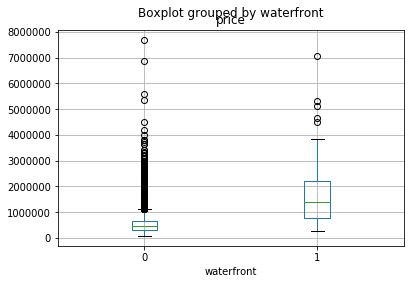

In [48]:
train.boxplot('price', 'waterfront')

In [49]:
from sklearn.ensemble import RandomForestRegressor 

In [50]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

In [51]:
regressor.fit(x_train, y_train)

C:\Users\Prachi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [52]:
y_pred = regressor.predict(x_test)

In [53]:
r2_score(y_test, y_pred)

0.8958235243133206

In [54]:
mean_squared_error(y_test, y_pred)

0.10973297592389226